Simple ML Titanic Survival

a) Importing Libraries
b) Reading and Understanding the Data
c) Data Preparation Featuring Engineering
d) Data Visualization & Cleaning
e) Selectin a Model
f) Prediction submission

a) Importing Libraries

In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

b) Reading and Understanding the Data

In [7]:
import pandas as pd 
train = pd.read_csv("train.csv")

test = pd.read_csv("test.csv")

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Remove features that have not influence in the analysis, as Cabin (Too many NaN values), Name and Ticket.

In [12]:
train = train.drop(["Cabin","Name", "Ticket"], axis=1)

In [13]:
test = test.drop(["Cabin","Name", "Ticket"], axis=1)

Missing Values: Age will be replaced by the mean age, Embarked will be replaced by "C" class, and Fare by mean fare.

In [14]:
train["Age"].mean()

29.69911764705882

In [15]:
train["Fare"].mean()

32.2042079685746

Completing the Data sets with mean values to remove NaN

In [16]:
train["Fare"] = train["Fare"].replace(np.nan, 32)
test["Fare"] = test["Fare"].replace(np.nan, 32)
train["Age"] = train["Age"].replace(np.nan, 30)
test["Age"] = test["Age"].replace(np.nan, 30)
train["Embarked"] = train["Embarked"].replace(np.nan, "C")


Verification that each data set is completed

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


Change categorical features Sex and Embarked by numbers

In [19]:
train["Sex"].replace(["female","male"] , [0,1], inplace = True)
test["Sex"].replace(["female","male"] , [0,1], inplace = True)
train["Embarked"].replace(["Q","S","C"],[0,1,2],inplace=True)
test["Embarked"].replace(["Q","S","C"],[0,1,2],inplace=True)

For better classification lets create a set of Age ranges

In [20]:
bins = [0,8,15,20,40,60,100]
names=(['Baby', 'Child', 'Teenager', 'Youngster', 'Adult', 'Senior Citizen'])

train["Age"] = pd.cut(train["Age"], bins, labels = names)
test["Age"] = pd.cut(test["Age"], bins, labels = names)

For better classification lets create a set of Fare ranges

In [21]:
train["Fare"] = pd.cut(train.Fare,[-1, 130, 260, 390, 520], labels=['1', '2', '3', '4'])
test["Fare"] = pd.cut(test.Fare,[-1, 130, 260, 390, 520], labels=['1', '2', '3', '4'])

Data visualization to see the relationships between Features and Survival. As you can see below about 75% of women survived. Also babies had hith chances to survive. Finally 63% of the First class passengers survived.

In [22]:
train.pivot_table(index = "Sex", values = "Survived")

,Survived
Sex,
0,0.742038
1,0.188908


In [23]:
train.pivot_table(index = "Pclass", values = "Survived")

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [24]:
train.pivot_table(index = "Age", values = "Survived")

,Survived
Age,
Baby,0.666667
Child,0.448276
Teenager,0.343750
Youngster,0.364769
Adult,0.390625
Senior Citizen,0.227273


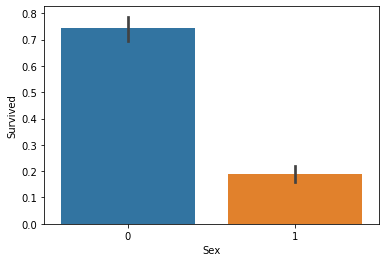

In [25]:
sns.barplot(x="Sex", y="Survived", data=train)
plt.show()

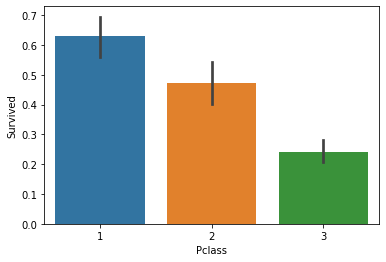

In [22]:
sns.barplot(x="Pclass", y="Survived", data=train)
plt.show()

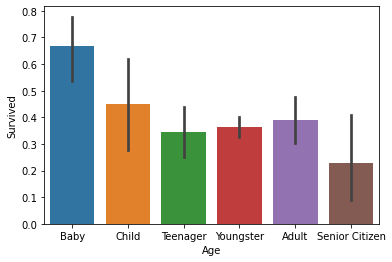

In [23]:
sns.barplot(x="Age", y="Survived", data=train)
plt.show()

Now lets chang Age categories by numbers.

In [26]:
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Youngster': 4, 'Adult': 5, 'Senior Citizen': 6}
train['Age'] = train['Age'].map(age_mapping)
test['Age'] = test['Age'].map(age_mapping)

Building a Model Using Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
lr = LogisticRegression()
columns = ['Pclass', 'Sex', 'SibSp','Embarked', 'Age', 'Fare']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
test_df = test
X = train[columns]
y = train["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,random_state=0)

In [35]:
from sklearn.metrics import accuracy_score
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.7932960893854749


Cross Validation

In [38]:
from sklearn.model_selection import cross_val_score

lr = LogisticRegression()
scores = cross_val_score(lr, X, y, cv=10)
accuracy = np.mean(scores)
print(scores)
print(accuracy)

[0.81111111 0.7752809  0.7752809  0.79775281 0.79775281 0.76404494
 0.79775281 0.76404494 0.80898876 0.80898876]
0.7900998751560551


The accuracy of the predictions is 0.79

Final Model using test dataset

In [36]:
#Final Model
columns = ['Pclass', 'Sex', 'SibSp','Embarked', 'Age', 'Fare']
lr = LogisticRegression()
lr.fit(X,y)
test_df_predictions = lr.predict(test_df[columns])

In [40]:
#Submission dataframe
test_df_ids = test_df["PassengerId"]
submission_df = {"PassengerId": test_df_ids,
                 "Survived": test_df_predictions}
submission = pd.DataFrame(submission_df)
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [33]:
submission.to_csv("submission.csv",index=False)


print(lr.score(X_test, y_test))

0.7988826815642458


**This is the end**